<a href="https://colab.research.google.com/github/parviza9999/MSDS462/blob/main/MSDS462_video3_Google_Vision_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-cloud-vision

     |████████████████████████████████| 370 kB 4.8 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 
     |████████████████████████████████| 111 kB 41.2 MB/s 
     |████████████████████████████████| 1.1 MB 48.0 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-translate 1.5.0 requires google-api-core[grpc]<2.0.0dev,>=1.6.0, but you have google-api-core 2.4.0 which is incompatible.
google-cloud-language 1.2.0 requires google-api-core[grpc]<2.0.0dev,>=1.6.0, but you have google-api-core 

In [1]:
import os

#from google.cloud import vision
#from google.cloud.vision import types
from google.cloud import vision_v1
from google.cloud.vision_v1 import types
request = vision_v1.GetProductSetRequest(name="name")

In [4]:
import numpy as np
import cv2
import urllib3 as urllib
import requests
import io
import PIL
import urllib.request
from google.colab.patches import cv2_imshow
#url = "https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2017/11/04133712/waterfall-750x500.jpg"



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#the JSON file you downloaded in step 5 above
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/drive/MyDrive/Colab Notebooks/MSDS462/avian-altar-238103-d736df7b3dcc.json'

In [6]:
# Instantiates a client
client = vision_v1.ImageAnnotatorClient()

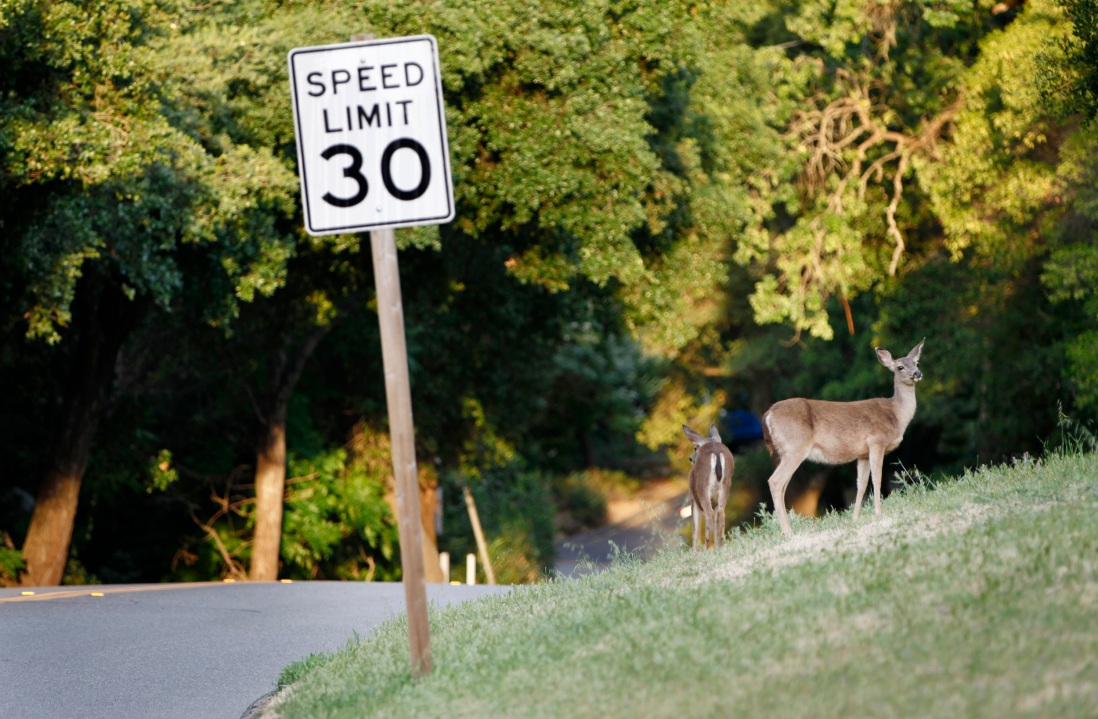

-1

In [7]:
#set this thumbnail as the url
image = types.Image()
#image.source.image_uri = 'https://i.ytimg.com/vi/UQQHSbeIaB0/maxresdefault.jpg'
#image.source.image_uri = 'https://i.imgur.com/OiBEhTv.jpg'
image.source.image_uri = 'https://i.imgur.com/jt9OoBH.jpg'
#image.source.image_uri = 'https://i.imgur.com/j0hesxk.jpg'
url = image.source.image_uri #"https://i.imgur.com/j0hesxk.jpg"
url_response = urllib.request.urlopen(url)
img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)
cv2_imshow(img)
cv2.waitKey()

In [8]:
#### LABEL DETECTION ######

response_label = client.label_detection(image=image)

for label in response_label.label_annotations:
    print({'label': label.description, 'score': label.score})

{'label': 'Plant', 'score': 0.9592040777206421}
{'label': 'Light', 'score': 0.91045743227005}
{'label': 'Green', 'score': 0.9020809531211853}
{'label': 'Tree', 'score': 0.8618853092193604}
{'label': 'Grass', 'score': 0.8509685397148132}
{'label': 'Natural landscape', 'score': 0.8421570658683777}
{'label': 'Deer', 'score': 0.8420986533164978}
{'label': 'Road surface', 'score': 0.8206296563148499}
{'label': 'Fawn', 'score': 0.8157222270965576}
{'label': 'Traffic sign', 'score': 0.8072866797447205}


In [9]:
#### FACE DETECTION ######

response_face = client.face_detection(image=image)

face_data = []

for face_detection in response_face.face_annotations:
    d = {
        'confidence': face_detection.detection_confidence,
        'joy': face_detection.joy_likelihood,
        'sorrow': face_detection.sorrow_likelihood,
        'surprise': face_detection.surprise_likelihood,
        'anger': face_detection.anger_likelihood
    }
    print(d)
    

In [10]:
#### IMAGE PROPERTIES ######

response_image = client.image_properties(image=image)

image_data = []

for c in response_image.image_properties_annotation.dominant_colors.colors[:3]:
    d = {
        'color': c.color,
        'score': c.score,
        'pixel_fraction': c.pixel_fraction
    }
    print(d)

{'color': red: 11.0
green: 18.0
blue: 9.0
, 'score': 0.09693902730941772, 'pixel_fraction': 0.17462584376335144}
{'color': red: 117.0
green: 122.0
blue: 51.0
, 'score': 0.08529549092054367, 'pixel_fraction': 0.04632652923464775}
{'color': red: 41.0
green: 54.0
blue: 23.0
, 'score': 0.05052214488387108, 'pixel_fraction': 0.04755102097988129}


In [11]:
#### TEXT DETECTION ######

response_text = client.text_detection(image=image)

for r in response_text.text_annotations:
    d = {
        'text': r.description
    }
    print(d)

{'text': 'SPEED\nLIMIT\n30\n'}
{'text': 'SPEED'}
{'text': 'LIMIT'}
{'text': '30'}
